<a href="https://colab.research.google.com/github/maiemahmoud/x-xlassification_new/blob/main/skin_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL   #pillow
#pip install pillow

In [34]:
# -*- coding: utf-8 -*-
"""skin_cancer_classification.ipynb
 
Automatically generated by Colaboratory.
 
Original file is located at
    https://colab.research.google.com/drive/1LTnnuuFhYOLPaIscr-ktWCepLocIVee1
"""
 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [100]:
#data path
trainpath = 'gdrive/My Drive/skin_cancer/Train/'
testpath = 'gdrive/My Drive/skin_cancer/Test/'
Valpath = 'gdrive/My Drive/skin_cancer/Val/Train/'


In [60]:
os.listdir(Valpath)

['vascular lesion',
 'squamous cell carcinoma',
 'seborrheic keratosis',
 'pigmented benign keratosis',
 'nevus',
 'melanoma',
 'dermatofibroma',
 'basal cell carcinoma',
 'actinic keratosis']

In [98]:
os.listdir(trainpath)

['pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion',
 'actinic keratosis',
 'nevus',
 'basal cell carcinoma',
 'melanoma',
 'dermatofibroma']

In [62]:
os.listdir(testpath)

['melanoma',
 'pigmented benign keratosis',
 'vascular lesion',
 'seborrheic keratosis',
 'dermatofibroma',
 'squamous cell carcinoma',
 'nevus',
 'actinic keratosis',
 'basal cell carcinoma']

In [101]:
for folder in os.listdir(trainpath):
    print (folder)
    print('--------------')
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
   # print(list(files[:3]))
    print(folder ,' ........' ,len(files), ' images')
    print('-----------------------------------------------------------------------------')



pigmented benign keratosis
--------------
pigmented benign keratosis  ........ 476  images
-----------------------------------------------------------------------------
seborrheic keratosis
--------------
seborrheic keratosis  ........ 77  images
-----------------------------------------------------------------------------
squamous cell carcinoma
--------------
squamous cell carcinoma  ........ 181  images
-----------------------------------------------------------------------------
vascular lesion
--------------
vascular lesion  ........ 139  images
-----------------------------------------------------------------------------
actinic keratosis
--------------
actinic keratosis  ........ 114  images
-----------------------------------------------------------------------------
nevus
--------------
nevus  ........ 357  images
-----------------------------------------------------------------------------
basal cell carcinoma
--------------
basal cell carcinoma  ........ 376  images
--------

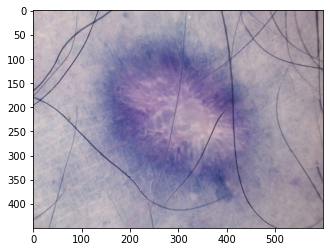

--------------------------------------------


In [102]:
img=cv2.imread(files[0])
plt.imshow(img)
plt.show()
print("--------------------------------------------")

In [103]:
Folder_name=[]
folder_item_numbers = []
for folder in os.listdir(trainpath):
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

                  Folder_name  Traning Image Numbers
0  pigmented benign keratosis                    476
1        seborrheic keratosis                     77
2     squamous cell carcinoma                    181
3             vascular lesion                    139
4           actinic keratosis                    114
5                       nevus                    357
6        basal cell carcinoma                    376
7                    melanoma                    438
8              dermatofibroma                     95


In [73]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

                  Folder_name  Traning Image Numbers
0                    melanoma                     16
1  pigmented benign keratosis                     16
2             vascular lesion                      3
3        seborrheic keratosis                      3
4              dermatofibroma                     16
5     squamous cell carcinoma                     16
6                       nevus                     16
7           actinic keratosis                     16
8        basal cell carcinoma                     16


In [104]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(Valpath ) : 
    files = gb.glob(pathname= str( Valpath  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

                  Folder_name  Traning Image Numbers
0             vascular lesion                      0
1     squamous cell carcinoma                      0
2        seborrheic keratosis                      0
3  pigmented benign keratosis                      0
4                       nevus                     18
5                    melanoma                     17
6              dermatofibroma                      0
7        basal cell carcinoma                     96
8           actinic keratosis                    114


In [105]:
#loading data and resize it and collect it in one folder
new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in files: 
        image_class = {'vascular lesion': 0, 'squamous cell carcinoma': 1,'seborrheic keratosis': 2 ,'pigmented benign keratosis': 3 ,'nevus': 4, 'melanoma': 5,'dermatofibroma': 6,'basal cell carcinoma': 7,'actinic keratosis': 8}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])
    print('image reading ...finished')
print('--------------------------------------------------')        
#check items in X_test
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 

folder name is :  pigmented benign keratosis
numbers of images in folder are :  476
 start reading images
image reading ...finished
folder name is :  seborrheic keratosis
numbers of images in folder are :  77
 start reading images
image reading ...finished
folder name is :  squamous cell carcinoma
numbers of images in folder are :  181
 start reading images
image reading ...finished
folder name is :  vascular lesion
numbers of images in folder are :  139
 start reading images
image reading ...finished
folder name is :  actinic keratosis
numbers of images in folder are :  114
 start reading images
image reading ...finished
folder name is :  nevus
numbers of images in folder are :  357
 start reading images
image reading ...finished
folder name is :  basal cell carcinoma
numbers of images in folder are :  376
 start reading images
image reading ...finished
folder name is :  melanoma
numbers of images in folder are :  438
 start reading images
image reading ...finished
folder name is :  d

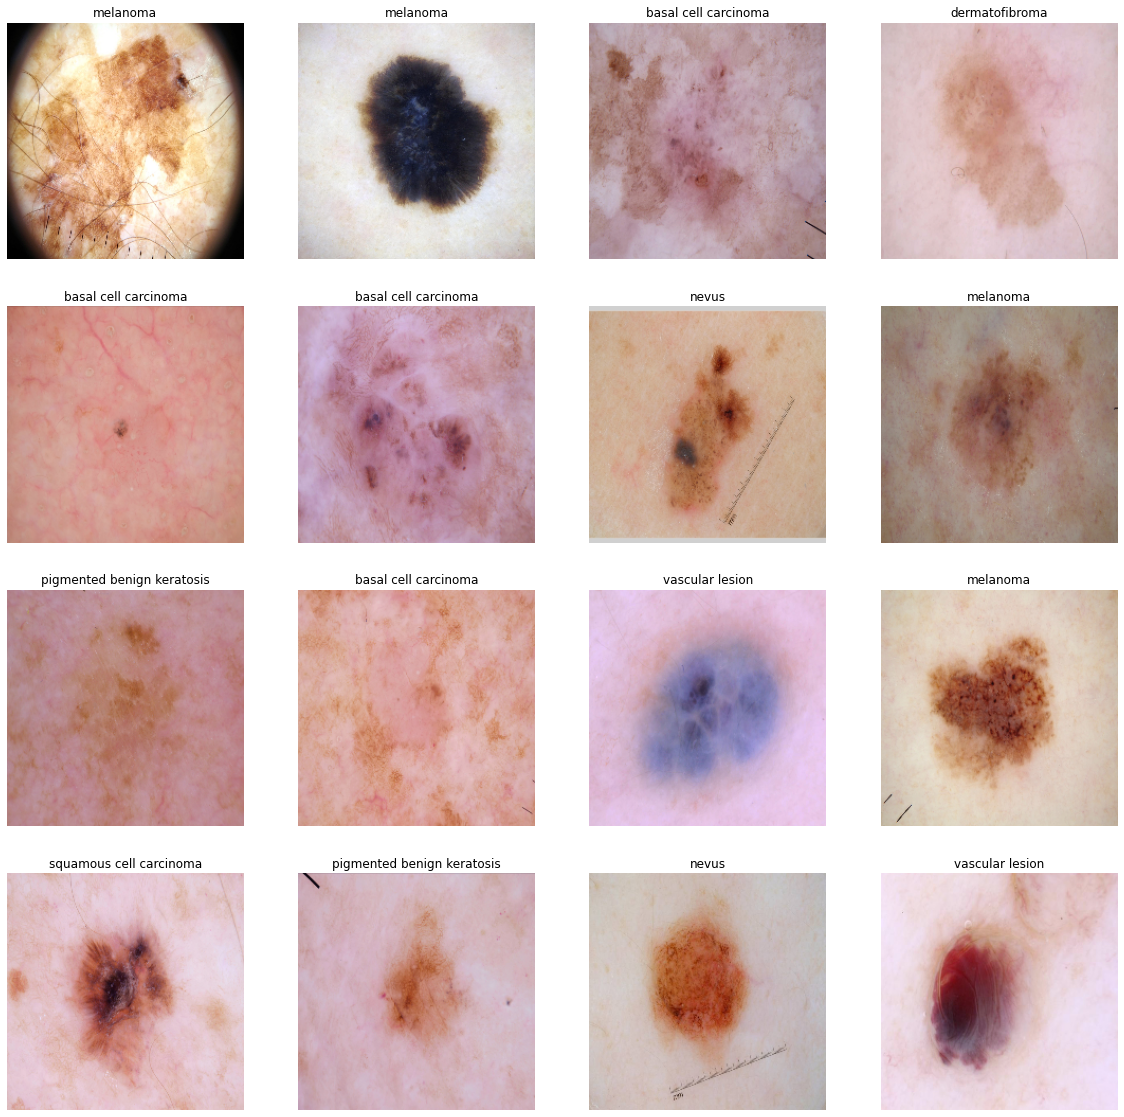

In [106]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train [i])   
    plt.axis('off')
    classes = {'vascular lesion': 0, 'squamous cell carcinoma': 1,'seborrheic keratosis': 2 ,'pigmented benign keratosis': 3 ,'nevus': 4, 'melanoma': 5,'dermatofibroma': 6,'basal cell carcinoma': 7,'actinic keratosis': 8}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))

In [107]:
#loading data and resize it and collect it in one folder
new_size=224    
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    for file in files: 
        image_class = {'vascular lesion': 0, 'squamous cell carcinoma': 1,'seborrheic keratosis': 2 ,'pigmented benign keratosis': 3 ,'nevus': 4, 'melanoma': 5,'dermatofibroma': 6,'basal cell carcinoma': 7,'actinic keratosis': 8 }
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_test.append(resized_image)
        y_test.append(image_class[folder])
#check items in X_test
print("items in X_test is:       ",len(X_test) , " items") 
print("items in y_test is:       ",len(y_test) , " items") 

folder name is :  melanoma
numbers of images in folder are :  16
folder name is :  pigmented benign keratosis
numbers of images in folder are :  16
folder name is :  vascular lesion
numbers of images in folder are :  3
folder name is :  seborrheic keratosis
numbers of images in folder are :  3
folder name is :  dermatofibroma
numbers of images in folder are :  16
folder name is :  squamous cell carcinoma
numbers of images in folder are :  16
folder name is :  nevus
numbers of images in folder are :  16
folder name is :  actinic keratosis
numbers of images in folder are :  16
folder name is :  basal cell carcinoma
numbers of images in folder are :  16
items in X_test is:        118  items
items in y_test is:        118  items


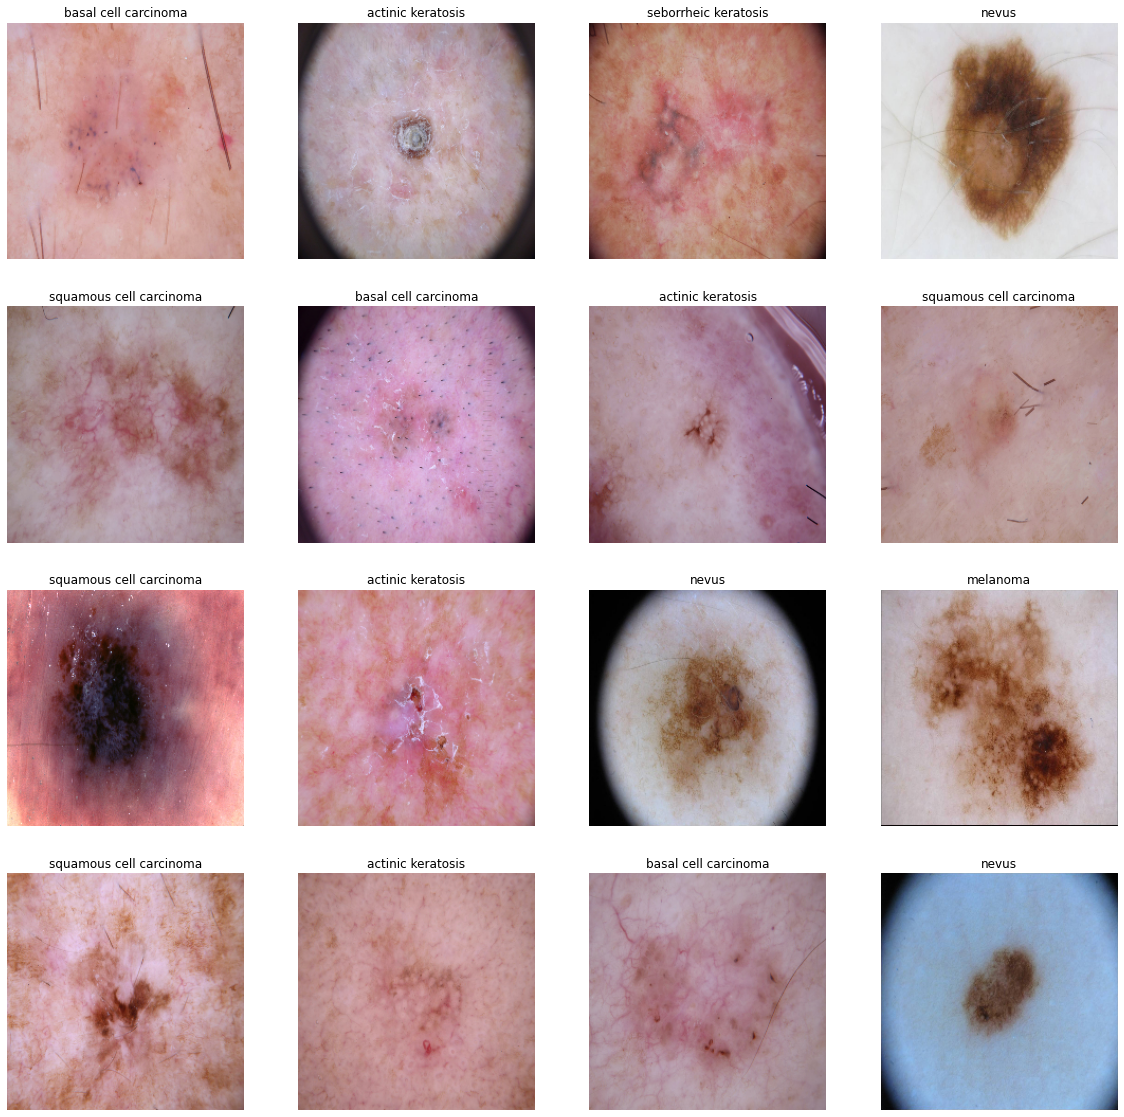

In [108]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    classes = {'vascular lesion': 0, 'squamous cell carcinoma': 1,'seborrheic keratosis': 2 ,'pigmented benign keratosis': 3 ,'nevus': 4, 'melanoma': 5,'dermatofibroma': 6,'basal cell carcinoma': 7,'actinic keratosis': 8 }
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_test[i]))

In [109]:
#loading data and resize it and collect it in one folder
new_size=224    
X_val = []
y_val = []
for folder in  os.listdir(Valpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( Valpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    for file in files: 
        image_class = {'vascular lesion': 0, 'squamous cell carcinoma': 1,'seborrheic keratosis': 2 ,'pigmented benign keratosis': 3 ,'nevus': 4, 'melanoma': 5,'dermatofibroma': 6,'basal cell carcinoma': 7,'actinic keratosis': 8 }
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_val.append(list(resized_image))
        y_val.append(image_class[folder])
#check items in X_test
print("items in X_val is:       ",len(X_val) , " items") 
print("items in y_val is:       ",len(y_val) , " items") 

folder name is :  vascular lesion
numbers of images in folder are :  0
folder name is :  squamous cell carcinoma
numbers of images in folder are :  0
folder name is :  seborrheic keratosis
numbers of images in folder are :  0
folder name is :  pigmented benign keratosis
numbers of images in folder are :  0
folder name is :  nevus
numbers of images in folder are :  18
folder name is :  melanoma
numbers of images in folder are :  17
folder name is :  dermatofibroma
numbers of images in folder are :  0
folder name is :  basal cell carcinoma
numbers of images in folder are :  96
folder name is :  actinic keratosis
numbers of images in folder are :  114
items in X_val is:        245  items
items in y_val is:        245  items


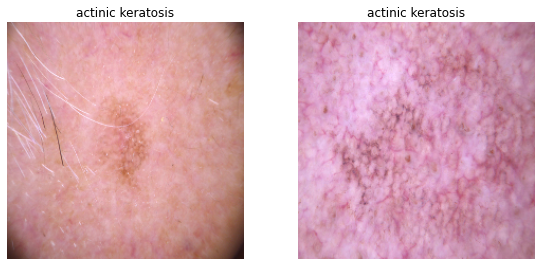

In [110]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_val),2))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_val[i])   
    plt.axis('off')
    classes = {'vascular lesion': 0, 'squamous cell carcinoma': 1,'seborrheic keratosis': 2 ,'pigmented benign keratosis': 3 ,'nevus': 4, 'melanoma': 5,'dermatofibroma': 6,'basal cell carcinoma': 7,'actinic keratosis': 8 }
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_val[i]))

In [111]:
#converting all TRAIN data to array
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape  : (2253, 224, 224, 3)
y_train shape : (2253,)


In [112]:
#converting all val data to array
X_val = np.array(X_val)
y_val = np.array(y_val)
print("X_val shape  :" ,X_val.shape)
print("y_val shape :", y_val.shape)

X_val shape  : (245, 224, 224, 3)
y_val shape : (245,)


In [113]:
#converting all TEST data to array
X_test = np.array(X_test)
y_test = np.array(y_test)
print("X_test shape  :" ,X_test.shape)
print("y_test shape :", y_test.shape)

X_test shape  : (118, 224, 224, 3)
y_test shape : (118,)


In [114]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,9)
y_val = to_categorical(y_val,9)
y_test = to_categorical(y_test,9)

In [115]:
#shuffle data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)
X_val,y_val = shuffle(X_val,y_val)
X_test,y_test = shuffle(X_test,y_test)

In [116]:
#normalizing data
X_train=X_train/255.0
X_val=X_val/255.0
X_test=X_test/255.0

In [121]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout


In [122]:
model = Sequential([
    Conv2D(16,3, padding = "same", activation = "relu" ,input_shape=(224, 224, 3)),
    MaxPooling2D(2),
    Conv2D(32,3, padding = "same", activation = "relu"),
    MaxPooling2D(2),
    Conv2D(64,3, padding = "same", activation = "relu"),
    MaxPooling2D(2),
    Flatten(),
    Dense(512,activation = "relu"),
    Dropout(0.3),
    Dense(9, activation='softmax')
])

In [123]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 64)      

In [124]:
opt=tf.keras.optimizers.Adam(0.0001)
#compliling model
#model.compile(optimizer='adam',loss='categorical_crossentropy' , metrics='accuracy')
model.compile(optimizer=opt,loss='categorical_crossentropy' , metrics='accuracy')

In [125]:
#training models
epochs=10
history = model.fit(X_train,y_train,
                     validation_data=(X_val,y_val),
                     epochs=epochs)

Epoch 1/10
71/71 [==============================] - 180s 3s/step - loss: 2.0204 - accuracy: 0.2565 - val_loss: 2.2521 - val_accuracy: 0.0490
Epoch 2/10
71/71 [==============================] - 175s 2s/step - loss: 1.7969 - accuracy: 0.3737 - val_loss: 2.0546 - val_accuracy: 0.1347
Epoch 3/10
71/71 [==============================] - 176s 2s/step - loss: 1.6337 - accuracy: 0.4354 - val_loss: 2.0616 - val_accuracy: 0.1184
Epoch 4/10
71/71 [==============================] - 176s 2s/step - loss: 1.5010 - accuracy: 0.4785 - val_loss: 1.9853 - val_accuracy: 0.2367
Epoch 5/10
71/71 [==============================] - 176s 2s/step - loss: 1.4051 - accuracy: 0.5220 - val_loss: 1.8530 - val_accuracy: 0.2980
Epoch 6/10
71/71 [==============================] - 182s 3s/step - loss: 1.3456 - accuracy: 0.5375 - val_loss: 1.5984 - val_accuracy: 0.4000
Epoch 7/10
71/71 [==============================] - 178s 3s/step - loss: 1.2956 - accuracy: 0.5526 - val_loss: 1.7795 - val_accuracy: 0.3224
Epoch 8/10
71

In [ ]:
#showing results and model accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
#epochs=30
epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(X_train,y_train)

In [ ]:
model.evaluate(X_val,y_val)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
y_test_pred[0]